# Proyek Analisis Data: E-Commerce Public
- **Nama:** Farhan Al Fauzan
- **Email:** mc180d5y1028@gmail.com
- **ID Dicoding:** MC180D5Y1028

## Menentukan Pertanyaan Bisnis

- Top 10 Kota Dengan Jumlah Pelanggan Terbanyak?
- Top 10 Kategori Produk Dengan Tingkat Penjualan Terbanyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
#Membaca dan Memasukkan dataset (1)
pelanggan = pd.read_csv('customers_dataset.csv')
pelanggan.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**

Hasil analisa diatas, telah dilakukan data wrangling yaitu gathering data, dan terdapat 5 data teratas dengan jumlah kolom sebanyak 5 kolom pada dataset customers

In [4]:
#Membaca dan Memasukkan dataset (2)
produk = pd.read_csv('products_dataset.csv')
produk.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**

Hasil analisa diatas, telah dilakukan data wrangling yaitu gathering data, dan terdapat 5 data teratas dengan jumlah kolom sebanyak 9 kolom pada dataset customers

# Assessing Data

### Menilai Tabel Pelanggan

In [5]:
#Menilai tabel pelanggan
pelanggan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**

Pada proses Assessing dataset pelanggan tidak terdapat masalah pada tipe data, dan tidak terdapat missing values pada masing masing kolom, Selanjutnya akan diperiksa apakah terdapat duplikasi

In [6]:
#Cek Duplikasi tabel pelanggan
print('Jumlah duplikasi:', pelanggan.duplicated().sum())

pelanggan.describe()

Jumlah duplikasi: 0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**

Hasil Assessing data tabel pelanggan tidak terdapat masalah pada tipe data, tidak terdapat duplikasi data dan tidak terdapat keanehan dalam ringkasan parameter statistik

### Menilai tabel produk

In [7]:
#Menilai tabel produk
produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**

Pada proses Assessing dataset produk tidak terdapat masalah pada tipe data, namun terdapat missing values pada beberapa kolom

In [8]:
#Cek Missing Values pada tabel produk
produk.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Hasil diatas terlihat ada 610 missing values pada kolom product category name,product name lenght, product description lenght dan product photos qty. Serta terdapat 2 missing values pada kolom product weight g,product lenght cm,product height cm, dan product width cm

In [9]:
#Cek Duplikasi tabel produk
print('Jumlah duplikasi:', produk.duplicated().sum())

produk.describe()

Jumlah duplikasi: 0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**

Hasil Assessing data tabel produk terdapat beberapa missing values

# Cleaning Data

### Cleaning Tabel produk

In [10]:
#Melakukan pembersihan data tabel produk
produk[produk.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


**Insight:**

Masih terdapat banyak missing value pada kolom product_category_name, sehingga akan kita gunakan metode imputation untuk menangani missing value

In [13]:
produk.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


**Insight:**

Berdasarkan hasil diatas terlihat bahwa yang memiliki nilai dominan adalah cama_mesa_banho, sehingga akan kita ganti untuk missing values

In [15]:
produk.fillna(value='cama_mesa_banho',inplace=True)

<ipython-input-15-d3e54158aeea>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'cama_mesa_banho' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  produk.fillna(value='cama_mesa_banho',inplace=True)


**Insight:**

Akan kita cek kembali apakah sudah berjalan kode diatas untuk mengidentifikasi missing value

In [16]:
produk.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**

Hasil diatas menunjukkan bahwa pembersihan pada missing value pada tabel produk telah berhasil

# Exploratory Data Analysis (EDA)

## Explore ...

### Data Tabel Pelanggan

In [19]:
#Melakukan Explore pada tabel Pelanggan
pelanggan.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


**Insight:**

Persebaran pelanggan tidak merata sehingga terdapan pelonjakkan jumlah pada beberapa kota seperti kota sao paulo

### Data Tabel Produk

In [20]:
#Melakukan Explore pada tabel Produk
produk.groupby(by='product_category_name').product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3639
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5
pc_gamer,3


**Insight:**

Kategori Produk tidak terjual merata pada pelanggan,sehingga masih ada beberapa kategori yang terjual hanya dibawah 10

## Visualization & Explanatory Analysis

### Pertanyaan 1:

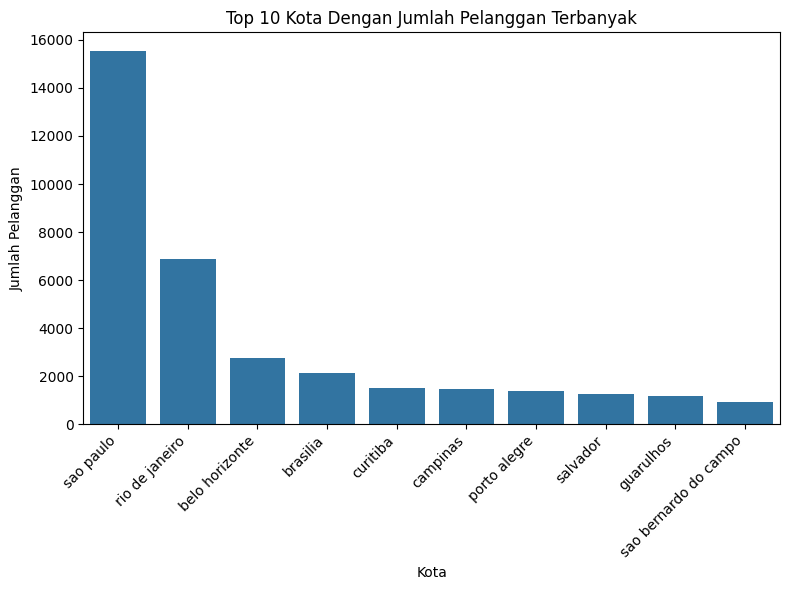

In [24]:
#Membuat plot untuk Kota Dengan Pesanan Terbanyak
jumlah_kota = pelanggan['customer_city'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=jumlah_kota.index, y=jumlah_kota.values)
plt.title('Top 10 Kota Dengan Jumlah Pelanggan Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**

Pada tabel diatas kita telah menganalisis terkait 10 kota teratas dengan jumlah pelanggan terbanyak

### Pertanyaan 2:

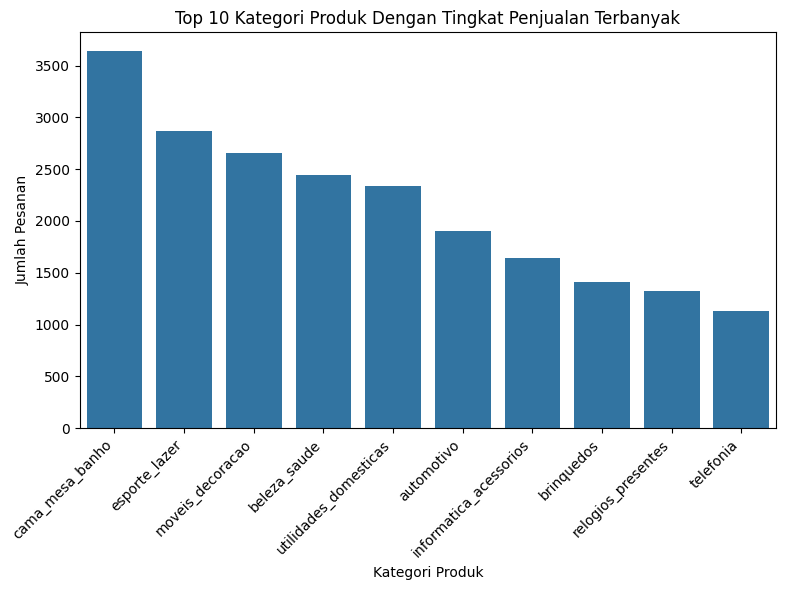

In [25]:
#Membuat plot untuk Kategori Produk Untuk Tingkat Penjualan Terbanyak
jumlah_produk = produk['product_category_name'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=jumlah_produk.index, y=jumlah_produk.values)
plt.title('Top 10 Kategori Produk Dengan Tingkat Penjualan Terbanyak')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**

Pada tabel diatas kita telah menganalisis terkait 10 Kategori Produk Dengan Tingkat Penjualan Terbanyak

## Analisis Lanjutan (Opsional)

## Conclusion

- Top 10 Kota dengan Jumlah Pelanggan Terbanyak adalah sao paulo,rio de janeiro,belo horizonte,brasilia,curitiba,campinas,porto alegre,salvador,guarulhos,dan sao bernardo do campo
- Top 10 Kategori Produk Dengan Tingkat Penjualan Terbanyak adalah cama mesa banho,esporte lazer,moveis decoracao,baleza saude,utilidades domesticas,automotivo,informatica_acessoris,bringquedos,relogios presentes dan telefonia